# An intuitive introduction to the Entropy

Let $X$ be a discrete random variable (RV) taking values from set $\mathcal{X}$ with probability mass function $P(X)$.

*Definition* the entropy $H(X)$ of the discrete random variable $X$ is
\begin{equation}
H(X) = \sum_{x\in\mathcal{X}}P(X)\log \frac{1}{P(X)} = -\sum_{x\in\mathcal{X}}P(X)\log P(X).
\end{equation}

How to make sense out of this definition? We'll, rather informally, argue below that the entrpy of an RV provides a lower bound on the amount of information provided by the RV, which we'll dfine as the average number of bits required to transmit the value the RV has taken.

As a motivating example consider asking your friend for advice. The probabilities of his answers are given in the table below:

| $x$      | $P(x)$ |
|----------|--------|
| OK       | $1/2$  |
| Average  | $1/4$  |
| Bad      | $1/8$  |
| Terrible | $1/8$  |

To transmit the answer of your friend you must introduce an *encoding*, e.g.:

| $x$      | $P(x)$ | Code 1 |
|----------|--------|--------|
| OK       | $1/2$  | 00     |
| Average  | $1/4$  | 01     |
| Bad      | $1/8$  | 10     |
| Terrible | $1/8$  | 11     |

Under this encoding, we spend 2 bits per answer.

However, we could also consider a variable length code, that uses shorter codewords for more frequent symbols:

| $x$      | $P(x)$ | Code 2 |
|----------|--------|--------|
| OK       | $1/2$  | 0      |
| Average  | $1/4$  | 10     |
| Bad      | $1/8$  | 110    |
| Terrible | $1/8$  | 111    |

Under this encoding the average number of bits to encode an answer is:
\begin{equation}
\mathbb{E}[L] = \frac{1}{2} \cdot 1 + \frac{1}{4} \cdot 2 + \frac{1}{8} \cdot 3 + \frac{1}{8} \cdot 3 = \frac{7}{8}
\end{equation}

Thus, the new code is more efficient. Is it the best we can do?

### The code space

We'll now try formalize the coding task, i.e. the assignment of code lengths to possible values of the RV. 

Let's first observe an important property of our code: in a variable length coding, no codeword can be the prefix of another one. Otherwise, decoding is not deterministic. Therefore, whenever a value is assigned a symbol of length $L$, $1/2^L$ of the code space is reserved and not available to other codes.

This can be visualised as a code space. Below, we indicate the codes assigned to symbols in the example and  grey-out codes that are not available because the shorter codes are used:

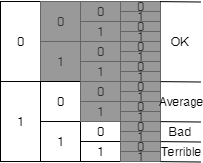

We can observe, that the length 1 code for "OK" uses $1/2$ of the available codes, the langth 2 code for "Average" uses $1/4$ and the two length 3 codes for "Bad" and "Terrible" each use $1/8$ of the code space.

In general, a code of length $L$ uses $1/2^L$ of the code space. Equivalently, assignign a fraction $f$ of the code space to a symbol makes it use a symbol of length $L=\log_2(1/f)$.

Assuming that we assign a fraction of a bit to a symbol, our optmal coding problem can be formulated as partitioning the code space into four regions (one for each value of the RV) such that the average length of the code is minised. 

Formally, let $p_1, p_2, p_3, p_4$ be the proibabilities asigned to the 4 symbols and let $f_1, f_2, f_3, f_4$ be the coding space fractoins assigned to them.

We want to:
\begin{align}
\text{minimize } &p_1 \log_2 \frac{1}{f_1} +  p_2 \log_2 \frac{1}{f_2} + p_3 \log_2 \frac{1}{f_3} + p_4 \log_2 \frac{1}{f_4} \\
\text{subject to: } & f_1 + f_2 + f_3 + f_4 = 1
\end{align}

For simplicity, we will solve this problem for the case of only two symbols:
\begin{align}
\text{minimize } &p_1 \log_2 \frac{1}{f_1} +  p_2 \log_2 \frac{1}{f_2} \\
\text{subject to: } & f_1 + f_2 = 1
\end{align}

Notice first that $p_2 = 1-p_1$ and likewise $f_2 = 1-f_1$. Then our minimization objective becomes
\begin{equation}
\text{minimize } C = p_1 \log_2 \frac{1}{f_1} +  (1-p_1) \log_2 \frac{1}{1-f_1} 
\end{equation}

To get the minimum over $f_1$ we compute the derivative of the expression with respect to $f_1$ and set it to zero:
\begin{equation}
\frac{\partial C}{\partial f_1} = \frac{p_1}{\log 2}\frac{-1}{f_1} + \frac{1 - p_1}{\log 2}\frac{1}{1 - f_1}
\end{equation}

Multiplying both sides by $\log 2 f_1 (1- f_1)$ we obtain:
\begin{align}
p_1(1-f_1) &= (1-p_1)f_1 \\
p_1 - p_1f_1 & =f_1 - p_1f_1 \\
f_1 &= p_1
\end{align}

Thus the optimal fraction of code space allocated to symbol 1 is $p_1$, the probability assigned to this symbol and the optimal code length is $\log_2(\frac{1}{p_1})$!

We now see, that the entropy 
\begin{equation}
H(X) = \sum_{x\in\mathcal{X}}P(X)\log \frac{1}{P(X)}
\end{equation}
is simply the average code length!

### A note about logarithm basis

It is custommary to copute the entropy using natural logarithms, which gives its value in "nats". IF $\log_2$ were used, the entrpy has units of bits and corresponds and lowerbounds the average amount of bits needed to transmit a value of the RV.

# Further Reading
1. Chris Olah "Visual Information theory": https://colah.github.io/posts/2015-09-Visual-Information/
2. JA Thomas ad TM Cover, "Elements of Information Theory", chapter 2